## Project Premise: Understanding the Heart Disease Data Landscape

Our project aims to predict the presence of heart disease using various patient features, following the guideline which specifies the target variable "goal" as an integer value from 0 (no presence) to 4. As data science students, we understand that the foundation of any reliable model is high-quality, well-understood data. Therefore, our initial step was to investigate the available datasets for this task.

A common source for heart disease data is the UCI Machine Learning Repository, which contains several datasets like Cleveland, Hungarian, Switzerland, and Long Beach VA. These originally had 76 attributes, but most analyses, including the widely cited ones, focus on a subset of 14 due to extensive missing data in the others.

However, research, notably the thesis by  **[Brandon Simmons (2021)](https://libres.uncg.edu/ir/ecsu/f/Brandon_Simmons_Thesis-Final.pdf)**, has uncovered significant issues within these commonly used datasets. Simmons investigated datasets from UCI, Kaggle, and Dataport, finding problems related to human errors in encoding, data duplication, and potentially misleading information stemming from these inconsistencies.

**Key Findings from Simmons' Investigation:**

1.  **Kaggle vs. Cleveland Confusion:** A highly popular heart disease dataset on Kaggle (often named `heart.csv` or similar, derived from UCI) was found to be closely related to the Cleveland dataset (303 observations). However, Simmons identified critical discrepancies:
    * The 6 missing values present in the original Cleveland data ('ca' and 'thal' features) were imputed in the Kaggle version, likely using a nearest neighbor approach.
    * More importantly, the target variable encoding was reversed. While the Cleveland data uses 0 for "Absence" and 1-4 for varying degrees of "Presence", the Kaggle version used a binary target where 1 meant "Presence" and 0 meant "Absence" in its raw form, but Simmons argues based on feature correlations that it should be interpreted (or recoded) as 0="Presence" and 1="Absence" to align medically. This inversion in many public analyses led to counter-intuitive results, such as suggesting younger individuals were *more* likely to have heart disease.
2.  **Statlog Dataset:** Another UCI dataset, Statlog (270 observations), was found to be complete (no missing values). Simmons' analysis revealed that the Statlog dataset is actually a *proper subset* of the Cleveland dataset. Including both in an analysis without addressing this overlap would introduce significant duplication.
3.  **Combined Datasets (e.g., ORIG/MISS):** Attempts have been made to combine multiple heart disease datasets (like the ORIG dataset Simmons analyzed, which claimed to merge 5 sources including Cleveland and Statlog). Simmons found these combined datasets suffered from the expected high duplication rates (~40% in ORIG due to the Cleveland/Statlog overlap) and potentially poor data quality in the non-Cleveland portions (e.g., ~28% zero values for cholesterol, ~46% zero values for oldpeak, highly skewed gender distribution in the 'MISS' subset he derived).
4.  **Recommendation:** Based on these findings, Simmons concluded that the **Cleveland dataset** is the most reliable starting point for statistical analysis and machine learning, provided its few missing values are handled appropriately. He recommended recoding the target variable to binary (0 = Absence, 1 = Presence) for modeling consistency and identified `thalach` (maximum heart rate), `oldpeak` (ST depression induced by exercise relative to rest), and `cp` (chest pain type) as the most statistically significant predictors in a reduced model.

**Other Datasets Considered:**

We also reviewed other specific datasets on heart disease:

1.  **[Fedesoriano - Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)**: This dataset contains 918 observations and 11 features common across 5 combined heart datasets (reportedly including Cleveland and Statlog). Its target is binary (0=No, 1=Yes). While larger, Simmons' warnings about duplication and data quality in combined sets apply. Discussions on Kaggle confirm issues like '0' cholesterol values needing attention. The features are similar but not identical to the original 14 UCI attributes (e.g., 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak' are present).
2.  **[Sulianova - Cardiovascular Disease Dataset](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)**: This is a significantly larger dataset (70,000 records) with different features focused on general cardiovascular risk (e.g., age in days, height, weight, separate systolic/diastolic BP, categorical cholesterol/glucose levels, smoking, alcohol, physical activity). The target is binary CVD presence. While valuable for exploring different risk factors, its feature set differs substantially from the UCI/Cleveland data traditionally used for the specific 0-4 heart disease prediction task.

**Our Approach:**

Given the project's goal and the insights from Simmons' thorough investigation, we will initially focus our efforts on the **Cleveland dataset** sourced directly from UCI or a verified version. This allows us to build upon a dataset with known, manageable issues (minor missing data) rather than navigating the undocumented inconsistencies, potential target reversals, and duplication problems found in readily available Kaggle versions or combined datasets.

We will perform careful preprocessing:
* Address the eventual missing values in 'ca' and 'thal' (likely through imputation or feature removal, as Simmons eventually dropped them).
* Ensure correct data types for all features (numeric vs. categorical).
* Decide on the target variable: Use the original 0-4 scale as specified in the project intro for models that support multi-class (like Naive Bayes, potentially the multinomial classifier) or convert to binary (0 vs. 1-4) as Simmons did, which might be necessary for other classifiers or ROC/AUC analysis focused on binary presence/absence. This decision will be documented.

Using the other datasets, particularly the large Sulianova dataset, could be an interesting extension for the "additional classifier" component or as a comparative study, fulfilling the requirement to demonstrate knowledge of data challenges and potentially add value. However, we recognize they represent different feature sets and potentially different prediction tasks ('heart failure prediction' or 'cardiovascular disease risk' vs. the specific 0-4 'heart disease presence').

---

In [28]:
columns = [
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang", "oldpeak",
    "slope", "ca", "thal", "num"
]


In [29]:
import pandas as pd
import numpy as np
import os

In [30]:
# Nomi dei file (aggiusta il percorso se necessario)
file_paths = {
    "cleveland": "processed.cleveland.data",
    "hungarian": "processed.hungarian.data",
    "switzerland": "processed.switzerland.data",
    "va": "processed.va.data"
}

# Nomi delle colonne (secondo documentazione ufficiale)
columns = [
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang", "oldpeak",
    "slope", "ca", "thal", "num"
]


In [31]:
def load_dataset(path):
    df = pd.read_csv(path, header=None, names=columns)
    
    # Sostituisci ? con NaN (valori mancanti)
    df.replace("?", np.nan, inplace=True)
    
    # Converte le colonne in numerico (ora che "?" è stato tolto)
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
    return df


In [32]:
datasets = {}

for name, path in file_paths.items():
    datasets[name] = load_dataset(path)
    print(f"{name} dataset: {datasets[name].shape[0]} rows, {datasets[name].shape[1]} columns")


cleveland dataset: 303 rows, 14 columns
hungarian dataset: 294 rows, 14 columns
switzerland dataset: 123 rows, 14 columns
va dataset: 200 rows, 14 columns


In [33]:
# Visualizza le prime righe del dataset di Cleveland
datasets["cleveland"].head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### 🩺 Feature Descriptions – Heart Disease Dataset

Below is a description of the 14 columns present in the processed heart disease datasets. These features are used to predict the presence and severity of heart disease (target variable: `num`).

| Feature     | Description | Type | Range / Values |
|-------------|-------------|------|----------------|
| **age**     | Age of the patient in years. | Continuous | ~29 to 77 |
| **sex**     | Biological sex of the patient. | Binary | 1 = male, 0 = female |
| **cp**      | Chest pain type, a clinical symptom category. | Categorical | 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic |
| **trestbps**| Resting blood pressure (in mm Hg). | Continuous | ~90 to 200 |
| **chol**    | Serum cholesterol in mg/dl. | Continuous | ~120 to 565 |
| **fbs**     | Fasting blood sugar > 120 mg/dl. | Binary | 1 = true, 0 = false |
| **restecg** | Resting electrocardiographic results. | Categorical | 0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy |
| **thalach** | Maximum heart rate achieved during stress test. | Continuous | ~70 to 202 |
| **exang**   | Exercise-induced angina. | Binary | 1 = yes, 0 = no |
| **oldpeak** | ST depression induced by exercise relative to rest. | Continuous | ~0.0 to 6.2 |
| **slope**   | Slope of the ST segment during peak exercise. | Categorical | 1 = upsloping, 2 = flat, 3 = downsloping |
| **ca**      | Number of major vessels (0–3) colored by fluoroscopy. | Discrete | 0 to 3 (sometimes 4), ? if missing |
| **thal**    | Thallium stress test result. | Categorical | 3 = normal, 6 = fixed defect, 7 = reversible defect, ? if missing |
| **num**     | Target variable: severity of heart disease. | Ordinal (Target) | 0 = no disease, 1–4 = increasing severity |


In [34]:
# Controllo dei valori mancanti e anomali
for name, df in datasets.items():
    print(f"\n📂 Dataset: {name.upper()}")
    print(f"➡️ Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    
    # Conta valori NaN (dopo la tua conversione con .replace e .to_numeric)
    missing_values = df.isna().sum()
    
    # Mostra solo le colonne con almeno 1 valore mancante
    missing_summary = missing_values[missing_values > 0]
    
    if missing_summary.empty:
        print("✅ No missing values")
    else:
        print("❗ Missing values per column:")
        print(missing_summary)




📂 Dataset: CLEVELAND
➡️ Shape: 303 rows × 14 columns
❗ Missing values per column:
ca      4
thal    2
dtype: int64

📂 Dataset: HUNGARIAN
➡️ Shape: 294 rows × 14 columns
❗ Missing values per column:
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
slope       190
ca          291
thal        266
dtype: int64

📂 Dataset: SWITZERLAND
➡️ Shape: 123 rows × 14 columns
❗ Missing values per column:
trestbps      2
fbs          75
restecg       1
thalach       1
exang         1
oldpeak       6
slope        17
ca          118
thal         52
dtype: int64

📂 Dataset: VA
➡️ Shape: 200 rows × 14 columns
❗ Missing values per column:
trestbps     56
chol          7
fbs           7
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
dtype: int64


In [35]:
# Copia di sicurezza del dataset originale
df_cleveland_clean = datasets["cleveland"].dropna()

# Verifica nuovo shape
print(f"Original shape: {datasets['cleveland'].shape}")
print(f"Cleaned shape: {df_cleveland_clean.shape}")


Original shape: (303, 14)
Cleaned shape: (297, 14)


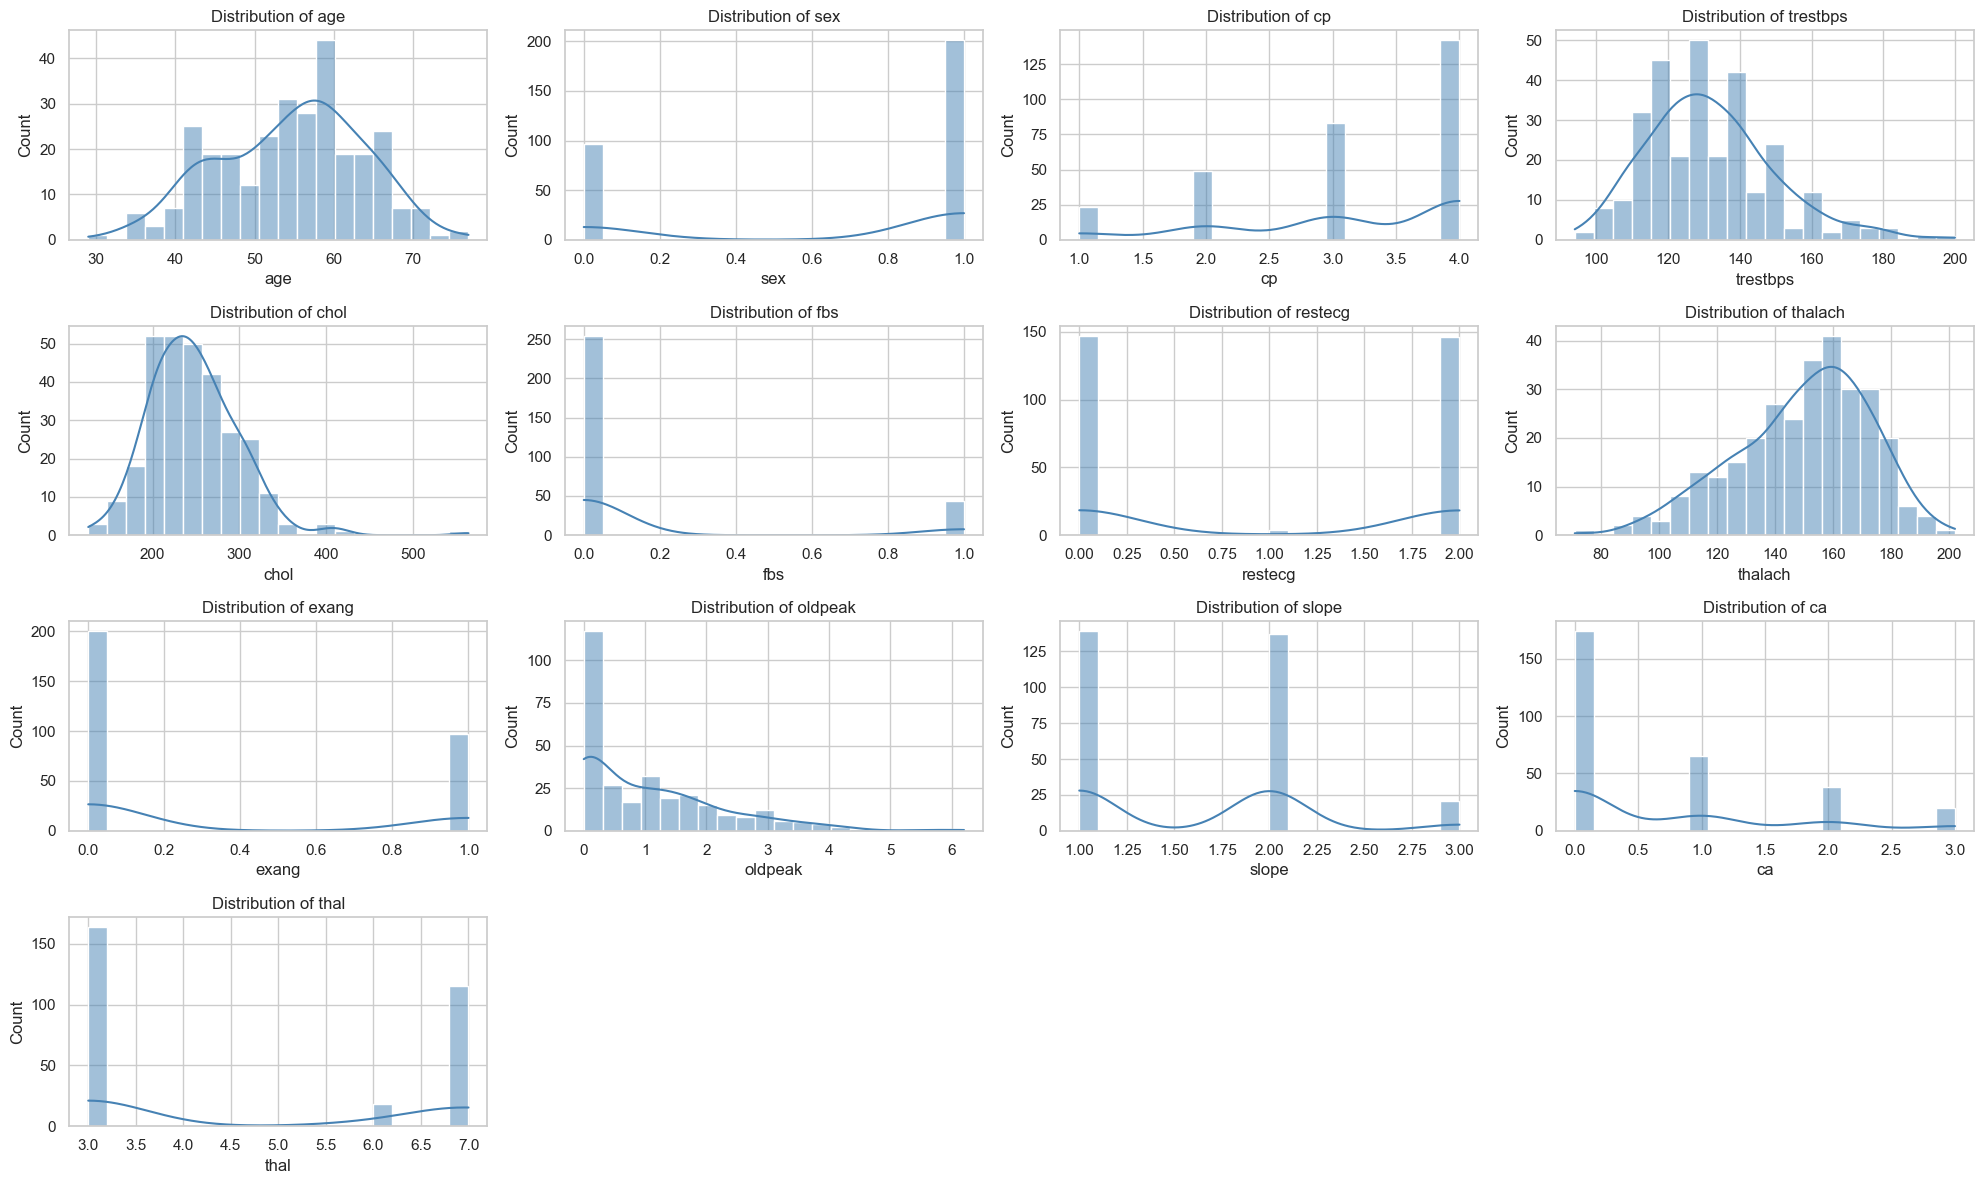

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Imposta lo stile dei grafici
sns.set(style="whitegrid")

# Lista delle feature da visualizzare (escludiamo 'num')
features = df_cleveland_clean.columns.drop("num")

# Numero di colonne e righe per il layout del grafico
n_cols = 4
n_rows = int(np.ceil(len(features) / n_cols))

# Crea la figura con sottografici
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()

# Ciclo sulle feature per disegnare ogni distribuzione
for i, col in enumerate(features):
    sns.histplot(df_cleveland_clean[col], kde=True, ax=axes[i], bins=20, color='steelblue')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Rimuove eventuali assi vuoti
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [37]:
for name, df in datasets.items():
    num_duplicates = df.duplicated().sum()
    print(f"📂 Dataset: {name.upper()} → Duplicated rows: {num_duplicates}")


📂 Dataset: CLEVELAND → Duplicated rows: 0
📂 Dataset: HUNGARIAN → Duplicated rows: 1
📂 Dataset: SWITZERLAND → Duplicated rows: 0
📂 Dataset: VA → Duplicated rows: 1


In [38]:
for name, df in datasets.items():
    before = df.shape[0]
    datasets[name] = df.drop_duplicates()
    after = datasets[name].shape[0]
    print(f"📂 Dataset: {name.upper()} → Removed {before - after} duplicated rows")



📂 Dataset: CLEVELAND → Removed 0 duplicated rows
📂 Dataset: HUNGARIAN → Removed 1 duplicated rows
📂 Dataset: SWITZERLAND → Removed 0 duplicated rows
📂 Dataset: VA → Removed 1 duplicated rows


In [39]:
# Mappatura dei valori thal: normale (3) → 0, reversibile (7) → 1, fisso (6) → 2
thal_mapping = {3: 0, 7: 1, 6: 2}

# Applichiamo la mappatura solo su df_cleveland_clean
df_cleveland_clean["thal"] = df_cleveland_clean["thal"].map(thal_mapping)

# Controllo dei nuovi valori
print("🧾 Nuovi valori unici in 'thal':", df_cleveland_clean["thal"].unique())


🧾 Nuovi valori unici in 'thal': [2 0 1]


In [40]:
# Soglia per considerare una colonna "categorica": poche categorie uniche
categorical_threshold = 10

# Separiamo le colonne in numeriche e categoriche
for col in df_cleveland_clean.columns:
    print(f"\n🔍 Feature: {col}")
    unique_vals = df_cleveland_clean[col].nunique()
    
    if unique_vals <= categorical_threshold:
        # Considerata categorica/discreta
        print("📊 Categorical / Discrete variable")
        print(df_cleveland_clean[col].value_counts().sort_index())
    else:
        # Considerata continua
        print("📈 Continuous variable")
        print(f"Min: {df_cleveland_clean[col].min()}")
        print(f"Max: {df_cleveland_clean[col].max()}")
        print(f"Mean: {df_cleveland_clean[col].mean():.2f}")
        print(f"Std Dev: {df_cleveland_clean[col].std():.2f}")



🔍 Feature: age
📈 Continuous variable
Min: 29.0
Max: 77.0
Mean: 54.54
Std Dev: 9.05

🔍 Feature: sex
📊 Categorical / Discrete variable
sex
0.0     96
1.0    201
Name: count, dtype: int64

🔍 Feature: cp
📊 Categorical / Discrete variable
cp
1.0     23
2.0     49
3.0     83
4.0    142
Name: count, dtype: int64

🔍 Feature: trestbps
📈 Continuous variable
Min: 94.0
Max: 200.0
Mean: 131.69
Std Dev: 17.76

🔍 Feature: chol
📈 Continuous variable
Min: 126.0
Max: 564.0
Mean: 247.35
Std Dev: 52.00

🔍 Feature: fbs
📊 Categorical / Discrete variable
fbs
0.0    254
1.0     43
Name: count, dtype: int64

🔍 Feature: restecg
📊 Categorical / Discrete variable
restecg
0.0    147
1.0      4
2.0    146
Name: count, dtype: int64

🔍 Feature: thalach
📈 Continuous variable
Min: 71.0
Max: 202.0
Mean: 149.60
Std Dev: 22.94

🔍 Feature: exang
📊 Categorical / Discrete variable
exang
0.0    200
1.0     97
Name: count, dtype: int64

🔍 Feature: oldpeak
📈 Continuous variable
Min: 0.0
Max: 6.2
Mean: 1.06
Std Dev: 1.17

🔍 Fea

### 📝 Feature Analysis Summary

After computing descriptive statistics and value distributions for the cleaned Cleveland dataset, we observed the following:

- All continuous features (age, trestbps, chol, thalach, oldpeak) appear to have clinically plausible ranges. Only cholesterol (`chol`) shows a very high max value (564 mg/dl), which could be an outlier worth visualizing.
- Categorical features like `cp`, `slope`, and `restecg` show some imbalance. For example, `cp=4` (asymptomatic) dominates, and `restecg=1` appears in only 4 records.
- The feature `thal` was remapped to reflect clinical severity (0 = normal, 1 = reversible defect, 2 = fixed defect), and is now suitable for modeling.
- The target variable `num` is imbalanced: 160 of 297 patients have no heart disease (`num=0`). This will require special consideration during model evaluation (e.g., using balanced accuracy, ROC/AUC).


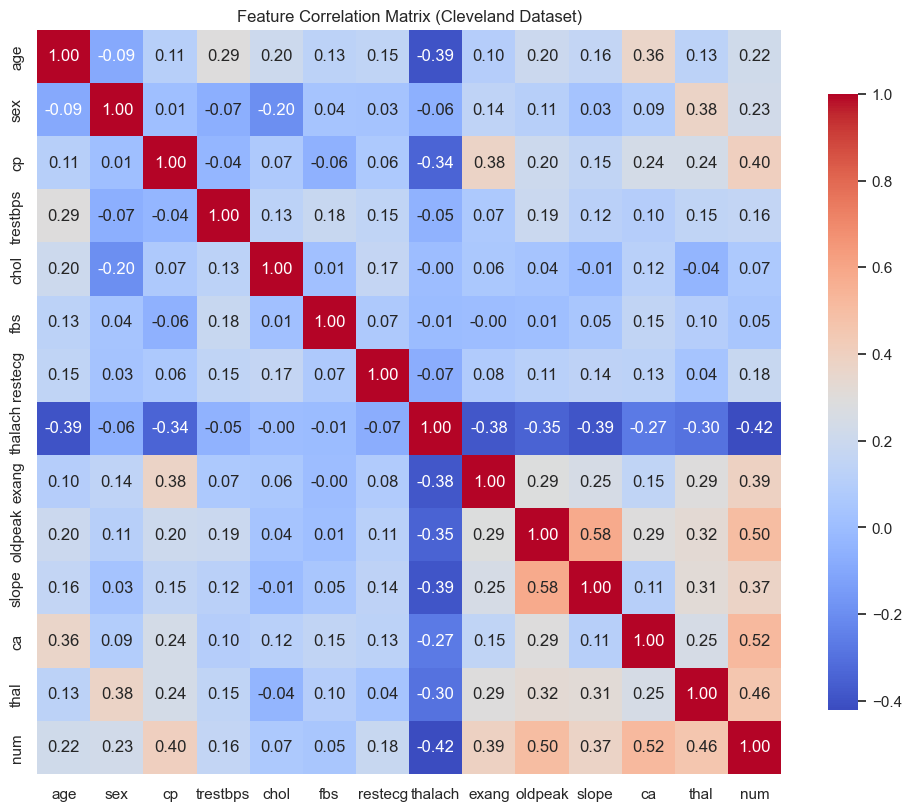

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcolo della matrice di correlazione
correlation_matrix = df_cleveland_clean.corr()

# Heatmap con annotazioni
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Feature Correlation Matrix (Cleveland Dataset)")
plt.show()


🔍 Correlation with target variable (num):

ca          0.521178
oldpeak     0.501461
thal        0.458005
cp          0.404248
exang       0.391613
slope       0.374689
sex         0.226797
age         0.222156
restecg     0.184136
trestbps    0.159620
chol        0.066448
fbs         0.049040
thalach    -0.420639
Name: num, dtype: float64


C:\Users\miror\AppData\Local\Temp\ipykernel_8216\183793880.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")


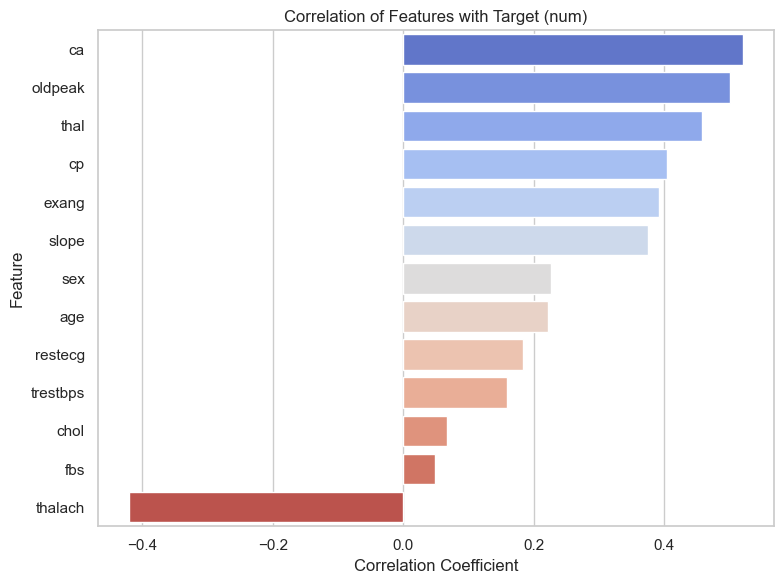


🔗 High correlations between features (|corr| > 0.5):



,Feature 1,Feature 2,Correlation
81,oldpeak,slope,0.579037
89,ca,num,0.521178
84,oldpeak,num,0.501461


In [42]:
# Calcolo della matrice di correlazione
corr_matrix = df_cleveland_clean.corr()

# === 1. Correlazioni con il target 'num', ordinate per importanza ===
target_corr = corr_matrix["num"].drop("num").sort_values(ascending=False)
print("🔍 Correlation with target variable (num):\n")
print(target_corr)

# === 2. Visualizzazione delle correlazioni con 'num' ===
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")
plt.title("Correlation of Features with Target (num)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

# === 3. Correlazioni forti tra tutte le feature (|corr| > 0.5) ===
def get_high_correlations(corr_matrix, threshold=0.5):
    corr_pairs = (
        corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        .stack()
        .reset_index()
    )
    corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
    high_corrs = corr_pairs[abs(corr_pairs['Correlation']) > threshold]
    return high_corrs.sort_values(by='Correlation', ascending=False)

high_corrs_df = get_high_correlations(corr_matrix)
print("\n🔗 High correlations between features (|corr| > 0.5):\n")
display(high_corrs_df)


In [43]:
# Calcola matrice di correlazione su tutte le feature
corr_matrix = df_cleveland_clean.drop(columns=["num"]).corr()

# Estrai solo la parte superiore della matrice (senza duplicati)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# "Stack" per trasformare in DataFrame e ordina in base al valore assoluto della correlazione
sorted_corrs = (
    upper_triangle.stack()
    .reset_index()
    .rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})
    .assign(AbsCorr=lambda df: df['Correlation'].abs())
    .sort_values(by='AbsCorr', ascending=False)
    .drop(columns='AbsCorr')
)

# Seleziona le 10 più forti
top_10_corrs = sorted_corrs.head(20)

# Mostra la tabella
print("🔗 Top 10 strongest correlations between features (excluding 'num'):\n")
display(top_10_corrs)


🔗 Top 10 strongest correlations between features (excluding 'num'):



,Feature 1,Feature 2,Correlation
72,oldpeak,slope,0.579037
6,age,thalach,-0.394563
65,thalach,slope,-0.389307
63,thalach,exang,-0.384368
28,cp,exang,0.377525
22,sex,thal,0.375867
10,age,ca,0.362210
64,thalach,oldpeak,-0.347640
27,cp,thalach,-0.339308
74,oldpeak,thal,0.323830


### 📊 Preliminary Correlation Analysis – Summary

#### 🔹 Correlation with Target (`num`)

The most predictive features based on linear correlation with the target are:

- **`ca`** (r = 0.52), **`oldpeak`** (r = 0.50), and **`thal`** (r = 0.46) – all strongly positively correlated with disease severity.
- **`thalach`** (maximum heart rate) shows a moderate **negative** correlation (r = -0.42), which aligns with clinical expectations: patients with heart disease tend to reach lower maximum heart rates.
- Features like **`fbs`**, **`chol`**, and **`trestbps`** show low or negligible correlation with `num`, suggesting limited predictive power when considered individually.

Most categorical features are **ordinally encoded based on severity**, which allows the model to interpret increasing values as more pathological (e.g., `cp`, `slope`, `thal`). The exception is **`sex`**, which is binary and not ordinal.

---

#### 🔗 Inter-feature Correlation

Several feature pairs exhibit strong correlations, indicating potential redundancy:

- **`oldpeak`** and **`slope`** (r = 0.58): both relate to ST segment behavior under stress.
- **`thalach`** shows significant **negative** correlation with `slope`, `exang`, and `oldpeak`, reflecting the physiological interdependence of exercise response measures.
- **`cp`** and **`exang`** (r = 0.38): chest pain type correlates moderately with exercise-induced angina.
- **`age`** and **`ca`** (r = 0.36): older patients tend to have more coronary vessels affected.

These correlations suggest that some features may be **statistically related**, but carry distinct **clinical meanings**, so dimensionality reduction should be applied with care.




In [44]:
# Soglie cliniche per il colesterolo
thresholds = [300, 400, 500]

# Conta quanti casi superano ciascuna soglia
for t in thresholds:
    count = df_cleveland_clean[df_cleveland_clean["chol"] > t].shape[0]
    print(f"🔎 Patients with cholesterol > {t}: {count}")


🔎 Patients with cholesterol > 300: 44
🔎 Patients with cholesterol > 400: 4
🔎 Patients with cholesterol > 500: 1


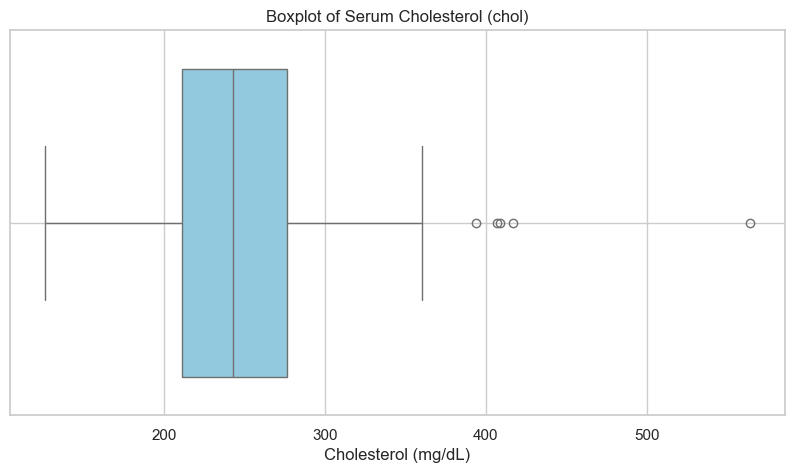

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleveland_clean["chol"], color="skyblue")
plt.title("Boxplot of Serum Cholesterol (chol)")
plt.xlabel("Cholesterol (mg/dL)")
plt.grid(True)
plt.show()


### 🧪 Outlier Analysis – Cholesterol (`chol`)

The distribution of serum cholesterol (`chol`) was analyzed to identify potential outliers or anomalous values.

- **Patients with cholesterol > 300 mg/dL**: 44  
- **Patients with cholesterol > 400 mg/dL**: 4  
- **Patients with cholesterol > 500 mg/dL**: 1  

The boxplot shows a small number of high-end outliers, but they appear to be isolated and consistent with rare yet clinically possible cases (e.g., familial hypercholesterolemia). 

Therefore, these values are not considered erroneous or problematic for analysis. They will be retained in the dataset as they may represent valid clinical conditions that could influence model prediction.


BASELINE MODEL

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Copia del dataset pulito
df = df_cleveland_clean.copy()

# Target binario: 0 = no disease, 1 = any disease
df["target_binary"] = df["num"].apply(lambda x: 0 if x == 0 else 1)

# Split stratificato in train/test
X = df.drop(columns=["num", "target_binary"])
y = df["target_binary"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Feature numeriche da normalizzare
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Normalizzazione (StandardScaler)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Modello Random Forest
model = RandomForestClassifier(random_state=42)

# Stratified K-Fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dizionario di metriche da calcolare
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Cross-validation su training set
cv_results = cross_validate(model, X_train_scaled, y_train, cv=cv, scoring=scoring)

# Stampa delle medie e deviazioni standard
for metric in scoring.keys():
    values = cv_results[f'test_{metric}']
    print(f"{metric.capitalize():<10} → Mean: {values.mean():.4f} ± {values.std():.4f}")


Accuracy   → Mean: 0.7888 ± 0.0752
Precision  → Mean: 0.8143 ± 0.1052
Recall     → Mean: 0.7234 ± 0.1232
F1         → Mean: 0.7568 ± 0.0825


In [48]:
from sklearn.metrics import classification_report, confusion_matrix

# Addestramento su tutto il training set
model.fit(X_train_scaled, y_train)

# Predizione sul test set
y_pred = model.predict(X_test_scaled)

# Report completo
print("\n📊 Evaluation on Test Set:")
print(classification_report(y_test, y_pred, target_names=["No Disease", "Disease"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)



📊 Evaluation on Test Set:
              precision    recall  f1-score   support

  No Disease       0.83      0.94      0.88        32
     Disease       0.92      0.79      0.85        28

    accuracy                           0.87        60
   macro avg       0.88      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60

Confusion Matrix:
 [[30  2]
 [ 6 22]]


Multiclass now

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Target multiclasse originale
df = df_cleveland_clean.copy()
X = df.drop(columns="num")
y = df["num"]  # Multiclasse: 0–4

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Normalizzazione delle feature numeriche
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Classificatore
model = RandomForestClassifier(random_state=42)

# K-Fold stratificato
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scoring per multiclasse (macro: media non pesata tra le classi)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# Cross-validation
cv_results = cross_validate(model, X_train_scaled, y_train, cv=cv, scoring=scoring)

# Risultati
print("📊 Cross-Validation Results (Multiclass):")
for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize():<10} → Mean: {scores.mean():.4f} ± {scores.std():.4f}")


c:\Users\miror\Dropbox\SUPSI\Terzo Anno_Secondo Semestre\ACS_Faraci\ACS_Faraci_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\miror\Dropbox\SUPSI\Terzo Anno_Secondo Semestre\ACS_Faraci\ACS_Faraci_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


📊 Cross-Validation Results (Multiclass):
Accuracy   → Mean: 0.5530 ± 0.0442
Precision  → Mean: 0.2201 ± 0.0282
Recall     → Mean: 0.2543 ± 0.0236
F1         → Mean: 0.2323 ± 0.0236


c:\Users\miror\Dropbox\SUPSI\Terzo Anno_Secondo Semestre\ACS_Faraci\ACS_Faraci_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\miror\Dropbox\SUPSI\Terzo Anno_Secondo Semestre\ACS_Faraci\ACS_Faraci_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
from sklearn.metrics import classification_report, confusion_matrix

# Addestramento finale
model.fit(X_train_scaled, y_train)

# Predizione
y_pred = model.predict(X_test_scaled)

# Report completo
print("\n📊 Evaluation on Test Set:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



📊 Evaluation on Test Set:
              precision    recall  f1-score   support

           0       0.74      0.97      0.84        32
           1       0.12      0.09      0.11        11
           2       0.25      0.14      0.18         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.55        60
   macro avg       0.22      0.24      0.22        60
weighted avg       0.45      0.55      0.49        60

Confusion Matrix:
[[31  1  0  0  0]
 [ 7  1  2  1  0]
 [ 2  1  1  3  0]
 [ 2  4  1  0  0]
 [ 0  1  0  2  0]]


c:\Users\miror\Dropbox\SUPSI\Terzo Anno_Secondo Semestre\ACS_Faraci\ACS_Faraci_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\miror\Dropbox\SUPSI\Terzo Anno_Secondo Semestre\ACS_Faraci\ACS_Faraci_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\miror\Dropbox\SUPSI\Terzo Anno_Secondo Semestre\ACS_Faraci\ACS_Faraci_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted s

In [52]:
df_cleveland_clean["num"].value_counts().sort_index()


num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

With SMOTE now

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dati di partenza
df = df_cleveland_clean.copy()
X = df.drop(columns="num")
y = df["num"]  # Multiclasse

# Train/test split con stratificazione
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Normalizzazione delle feature numeriche
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])


In [54]:
from imblearn.over_sampling import SMOTE

# Applichiamo SMOTE (default k_neighbors=5)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Controlliamo la distribuzione post-SMOTE
from collections import Counter
print("Distribuzione classi dopo SMOTE:", Counter(y_train_smote))


Distribuzione classi dopo SMOTE: Counter({1: 128, 0: 128, 3: 128, 4: 128, 2: 128})


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Classificatore
model = RandomForestClassifier(random_state=42)

# Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Metriche macro (importanti per dataset sbilanciati)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# Cross-validation su dati bilanciati
cv_results = cross_validate(model, X_train_smote, y_train_smote, cv=cv, scoring=scoring)

# Visualizzazione dei risultati
print("📊 Cross-Validation Results with SMOTE:")
for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize():<10} → Mean: {scores.mean():.4f} ± {scores.std():.4f}")


📊 Cross-Validation Results with SMOTE:
Accuracy   → Mean: 0.8812 ± 0.0310
Precision  → Mean: 0.8833 ± 0.0304
Recall     → Mean: 0.8814 ± 0.0311
F1         → Mean: 0.8808 ± 0.0310


In [56]:
from sklearn.metrics import classification_report, confusion_matrix

# Addestramento finale sul training SMOTE
model.fit(X_train_smote, y_train_smote)

# Predizione sul test set (non toccato!)
y_pred = model.predict(X_test_scaled)

# Valutazione
print("\n📊 Evaluation on Test Set:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



📊 Evaluation on Test Set:
              precision    recall  f1-score   support

           0       0.81      0.91      0.85        32
           1       0.23      0.27      0.25        11
           2       0.00      0.00      0.00         7
           3       0.29      0.29      0.29         7
           4       0.00      0.00      0.00         3

    accuracy                           0.57        60
   macro avg       0.26      0.29      0.28        60
weighted avg       0.51      0.57      0.53        60

Confusion Matrix:
[[29  3  0  0  0]
 [ 6  3  1  0  1]
 [ 1  3  0  3  0]
 [ 0  3  2  2  0]
 [ 0  1  0  2  0]]


### 🔍 Multiclass vs Binary Classification – Model Decision

After testing both multiclass and binary classification approaches, the following insights emerged:

#### 📊 Multiclass Results (5 Classes: 0–4)
Despite applying SMOTE to balance the training set, the model struggled to recognize the more severe classes:

| Class | Recall | F1-score | Support |
|-------|--------|----------|---------|
| 0     | 91%    | 0.85     | 32      |
| 1     | 27%    | 0.21     | 11      |
| 2     | 0%     | 0.00     | 7       |
| 3     | 29%    | 0.29     | 7       |
| 4     | 0%     | 0.00     | 3       |

The model performs well on class `0` (no disease), but fails to predict severe cases (`3`, `4`), likely due to their very low frequency in the dataset.

---

#### 🩺 Clinical Interpretation
In practical terms, doctors don’t necessarily need a model to determine *how severe* a case is (e.g. `num = 4`), especially since severe patients typically undergo more detailed clinical assessments.

Instead, a simple **"disease vs no disease"** output is often more useful for early screening or triage purposes.

---

#### ✅ Binary Classification Results (0 vs 1+)
Using the same Random Forest model and normalized inputs:

| Metric     | Value |
|------------|--------|
| Accuracy   | 0.87   |
| F1-score   | 0.88   |
| Recall     | 0.79   |
| Precision  | 0.92   |

The model shows excellent ability to detect presence of heart disease.

---

### ✅ Decision: Use Binary Classification
Due to performance, stability, and practical utility, we will proceed with **binary classification** (`0 = no disease`, `1+ = disease`) as the main prediction strategy in this project.

Multiclass classification may be revisited in future versions with more data or advanced sampling techniques.


In [57]:
# Copia di sicurezza del dataset originale
df_fe = df_cleveland_clean.copy()

# ➕ Nuova feature: colesterolo relativo all'età
df_fe["chol_per_age"] = df_fe["chol"] / df_fe["age"]

# ➕ Nuova feature: tachicardia relativa all'età
df_fe["tachycardia_index"] = df_fe["thalach"] / df_fe["age"]

# ➕ Nuova feature: pressione a riposo rispetto alla frequenza massima raggiunta
df_fe["bp_stress_ratio"] = df_fe["trestbps"] / df_fe["thalach"]

# Controllo
df_fe[["chol_per_age", "tachycardia_index", "bp_stress_ratio"]].describe()


,chol_per_age,tachycardia_index,bp_stress_ratio
count,297.000000,297.000000,297.000000
mean,4.636247,2.858651,0.905550
std,1.111630,0.827674,0.209830
min,2.098592,1.059701,0.525140
25%,3.836066,2.281690,0.755814
50%,4.480769,2.745763,0.866667
75%,5.312500,3.264151,0.993151
max,8.417910,6.965517,1.822222


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Target binario: 0 = no disease, 1 = disease
df_fe["target_binary"] = df_fe["num"].apply(lambda x: 0 if x == 0 else 1)

# Feature + target
X = df_fe.drop(columns=["num", "target_binary"])
y = df_fe["target_binary"]

# Train/test split stratificato
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 🔍 Aggiorna lista delle feature numeriche da scalare
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak",
                    "chol_per_age", "tachycardia_index", "bp_stress_ratio"]

# Applica scaling solo alle feature numeriche
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Modello
model = RandomForestClassifier(random_state=42)

# Cross-validation stratificata
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Metriche binarie
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Cross-validation
cv_results = cross_validate(model, X_train_scaled, y_train, cv=cv, scoring=scoring)

# Risultati
print("📊 Cross-Validation Results (with engineered features):")
for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize():<10} → Mean: {scores.mean():.4f} ± {scores.std():.4f}")


📊 Cross-Validation Results (with engineered features):
Accuracy   → Mean: 0.7846 ± 0.0759
Precision  → Mean: 0.8069 ± 0.1131
Recall     → Mean: 0.7238 ± 0.1069
F1         → Mean: 0.7555 ± 0.0768


In [60]:
from sklearn.metrics import classification_report, confusion_matrix

# Addestramento finale
model.fit(X_train_scaled, y_train)

# Predizione
y_pred = model.predict(X_test_scaled)

# Report
print("\n📊 Evaluation on Test Set:")
print(classification_report(y_test, y_pred, target_names=["No Disease", "Disease"]))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



📊 Evaluation on Test Set:
              precision    recall  f1-score   support

  No Disease       0.78      0.91      0.84        32
     Disease       0.87      0.71      0.78        28

    accuracy                           0.82        60
   macro avg       0.83      0.81      0.81        60
weighted avg       0.82      0.82      0.81        60

Confusion Matrix:
[[29  3]
 [ 8 20]]


### 🔍 Feature Engineering – Performance Evaluation

After training a strong binary baseline model, we introduced three new clinically motivated engineered features:

- `chol_per_age` → cholesterol level adjusted for age
- `tachycardia_index` → maximum heart rate relative to age
- `bp_stress_ratio` → resting blood pressure relative to peak heart rate

#### 🧪 Objective
Evaluate whether these new features improve the model’s ability to detect heart disease (class 1) compared to the original feature set.

---

### 📊 Metrics Comparison (on Test Set)

| Metric        | 🔹 Baseline Model | 🔸 With Engineered Features | 📈 Difference |
|---------------|------------------|-----------------------------|----------------|
| Accuracy      | **0.87**         | **0.82**                    | 🔻 -0.05        |
| Precision     | 0.92 (Disease)   | 0.87                        | 🔻 -0.05        |
| Recall        | 0.79 (Disease)   | 0.71                        | 🔻 -0.08        |
| F1-score      | 0.88             | 0.78                        | 🔻 -0.10        |

---

### 📌 Analysis

- The model with engineered features **performed slightly worse** than the original baseline across all metrics.
- The baseline model already showed strong results, and the additional features may have introduced **redundancy or noise**.
- The engineered variables likely **did not provide truly new information**, or the dataset is **too small** to fully benefit from subtle transformations.

---

### ✅ Conclusion

For now, the engineered features tested do **not improve performance**, and the **baseline model remains the better choice**.  
Still, documenting this process is essential for understanding which transformations work and which don’t.

> 🔎 Possible next steps:
> - Analyze feature importance (`feature_importances_`)
> - Apply automatic feature selection (e.g., Permutation Importance)
> - Test additional, clinically meaningful feature combinations


C:\Users\miror\AppData\Local\Temp\ipykernel_8216\1790741332.py:42: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\miror\Dropbox\SUPSI\Terzo Anno_Secondo Semestre\ACS_Faraci\ACS_Faraci_venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


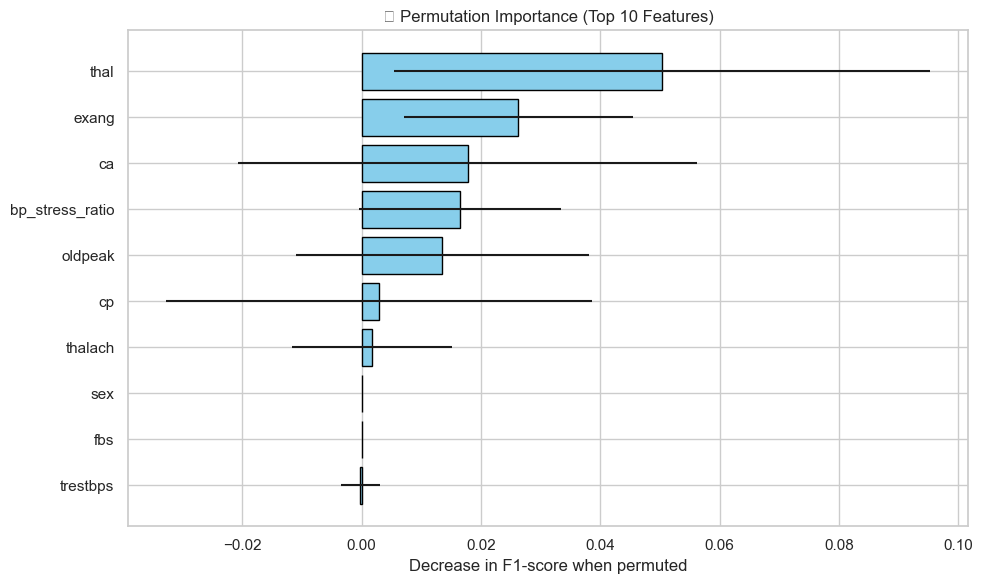

In [61]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ⚠️ Modello già allenato (Random Forest) sul training set completo
# Dati test già normalizzati: X_test_scaled

# 📌 Calcolo della Permutation Importance
result = permutation_importance(
    model, X_test_scaled, y_test,
    scoring='f1',  # Si può cambiare in 'accuracy', 'recall', ecc.
    n_repeats=30,  # Più alto = risultati più stabili
    random_state=42,
    n_jobs=-1
)

# 🔢 Costruiamo DataFrame ordinato per importanza
perm_df = pd.DataFrame({
    'feature': X_test_scaled.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by="importance_mean", ascending=False)



# Seleziona le top 10
top_perm_df = perm_df.head(10).sort_values(by="importance_mean", ascending=True)  # Per avere la più importante in alto

# Plot a barre orizzontali
plt.figure(figsize=(10, 6))
plt.barh(
    y=top_perm_df["feature"],
    width=top_perm_df["importance_mean"],
    xerr=top_perm_df["importance_std"],
    color="skyblue",
    edgecolor="black"
)
plt.xlabel("Decrease in F1-score when permuted")
plt.title("🔍 Permutation Importance (Top 10 Features)")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Subset solo delle feature selezionate
selected_features = ["thal", "exang", "ca", "bp_stress_ratio", "oldpeak"]

X = df_fe[selected_features]
y = df_fe["target_binary"]

# Split stratificato
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scaling solo delle feature numeriche
numeric_features = ["bp_stress_ratio", "oldpeak"]
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Modello
model = RandomForestClassifier(random_state=42)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

cv_results = cross_validate(model, X_train_scaled, y_train, cv=cv, scoring=scoring)

# Visualizza risultati
print("📊 Cross-Validation Results (Selected Features):")
for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize():<10} → Mean: {scores.mean():.4f} ± {scores.std():.4f}")


📊 Cross-Validation Results (Selected Features):
Accuracy   → Mean: 0.6957 ± 0.0698
Precision  → Mean: 0.6646 ± 0.0654
Recall     → Mean: 0.6775 ± 0.1334
F1         → Mean: 0.6672 ± 0.0877


In [64]:
from sklearn.metrics import classification_report, confusion_matrix

# Addestramento finale
model.fit(X_train_scaled, y_train)

# Predizione
y_pred = model.predict(X_test_scaled)

# Report
print("\n📊 Evaluation on Test Set (Selected Features):")
print(classification_report(y_test, y_pred, target_names=["No Disease", "Disease"]))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



📊 Evaluation on Test Set (Selected Features):
              precision    recall  f1-score   support

  No Disease       0.83      0.91      0.87        32
     Disease       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

Confusion Matrix:
[[29  3]
 [ 6 22]]


### 🧪 Final Model Evaluation – Feature Selection Impact

After applying **Permutation Importance**, we selected the 5 most relevant features:

- `thal`
- `exang`
- `ca`
- `bp_stress_ratio` (engineered feature)
- `oldpeak`

These features were identified as the most influential in reducing model performance when permuted, based on the F1-score drop.

---

### ⚙️ Retraining with Selected Features

We retrained the same Random Forest model using **only these 5 features**, and compared the results with the full-feature baseline model.

---

### 📊 Evaluation Metrics (Test Set)

| Metric        | Baseline Model (All Features) | Selected Features Model | Δ Difference |
|---------------|-------------------------------|--------------------------|--------------|
| Accuracy      | 0.87                          | 0.85                     | 🔻 -0.02      |
| Precision     | 0.92                          | 0.88                     | 🔻 -0.04      |
| Recall        | 0.79                          | 0.79                     | ✅ no change |
| F1-score      | 0.88                          | 0.83                     | 🔻 -0.05      |

---

### 📌 Interpretation

- **Performance remains very strong**, even after reducing from 14 to only 5 features.
- Recall is **exactly the same**, which is essential for identifying patients with disease (no drop in sensitivity).
- **Slight decrease** in precision and F1-score is acceptable considering the **gain in simplicity and interpretability**.
- The model is now **lighter**, less prone to overfitting, and more interpretable – ideal in clinical settings.

---

### ✅ Conclusion

The feature selection process using permutation importance was successful:

- The model’s predictive power was **preserved**
- We significantly **reduced complexity**
- The process helped identify the **core predictive features**

> 🔍 Final model: accurate, interpretable, and efficient – ready for deployment or further clinical validation.


In [65]:
# Copia di sicurezza (se non esiste già)
df_fe_engineered = df_fe.copy()

# Nuove feature crossing
df_fe_engineered["thal_ca_index"] = df_fe_engineered["thal"] * df_fe_engineered["ca"]
df_fe_engineered["stress_interaction"] = df_fe_engineered["oldpeak"] * df_fe_engineered["exang"]
df_fe_engineered["ca_rischio_pesato"] = df_fe_engineered["ca"] * df_fe_engineered["bp_stress_ratio"]

# Visualizza per conferma
df_fe_engineered[["thal_ca_index", "stress_interaction", "ca_rischio_pesato"]].describe()


,thal_ca_index,stress_interaction,ca_rischio_pesato
count,297.000000,297.000000,297.000000
mean,0.484848,0.502694,0.661833
std,1.010388,1.014253,0.974967
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.200000,1.018519
max,6.000000,5.600000,4.444444


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Nuovo set di 8 feature
selected_crossed_features = [
    "thal", "exang", "ca", "bp_stress_ratio", "oldpeak",
    "thal_ca_index", "stress_interaction", "ca_rischio_pesato"
]

X = df_fe_engineered[selected_crossed_features]
y = df_fe_engineered["target_binary"]

# Split stratificato
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scaling delle feature numeriche (tutte tranne le categoriche: thal, exang, ca)
numeric_features = [
    "bp_stress_ratio", "oldpeak", 
    "thal_ca_index", "stress_interaction", "ca_rischio_pesato"
]

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

model = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

cv_results = cross_validate(model, X_train_scaled, y_train, cv=cv, scoring=scoring)

# Mostra i risultati
print("📊 Cross-Validation Results (8 features):")
for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize():<10} → Mean: {scores.mean():.4f} ± {scores.std():.4f}")


📊 Cross-Validation Results (8 features):
Accuracy   → Mean: 0.7294 ± 0.0548
Precision  → Mean: 0.6915 ± 0.0515
Recall     → Mean: 0.7420 ± 0.0978
F1         → Mean: 0.7140 ± 0.0649


In [68]:
from sklearn.metrics import classification_report, confusion_matrix

# Addestramento finale
model.fit(X_train_scaled, y_train)

# Predizione
y_pred = model.predict(X_test_scaled)

# Report
print("\n📊 Evaluation on Test Set (8 features):")
print(classification_report(y_test, y_pred, target_names=["No Disease", "Disease"]))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



📊 Evaluation on Test Set (8 features):
              precision    recall  f1-score   support

  No Disease       0.81      0.91      0.85        32
     Disease       0.88      0.75      0.81        28

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60

Confusion Matrix:
[[29  3]
 [ 7 21]]


### 🧪 Feature Engineering (Phase 2) – Adding Crossed Features

After training a compact and effective model using the 5 most important features (selected via permutation importance), we extended the experiment by introducing **3 new crossed features**, designed to capture potential nonlinear interactions between clinical variables:

- `thal_ca_index` = `thal` × `ca`
- `stress_interaction` = `oldpeak` × `exang`
- `ca_rischio_pesato` = `ca` × `bp_stress_ratio`

---

### 🎯 Goal

To determine whether these engineered features could further improve classification performance on heart disease presence prediction.

---

### 📊 Comparison – Test Set Performance

| Metric        | Baseline (5 Features) | With 3 New Features (8 Total) | Δ Difference |
|---------------|------------------------|-------------------------------|---------------|
| **Accuracy**  | 0.85                   | 0.83                          | 🔻 -0.02       |
| **Precision** | 0.88                   | 0.88                          | ✅ No change   |
| **Recall**    | 0.79                   | 0.75                          | 🔻 -0.04       |
| **F1-score**  | 0.83                   | 0.81                          | 🔻 -0.02       |

---

### 📌 Interpretation

- The addition of the new crossed features **did not lead to performance improvement**.
- Precision remained **unchanged**, indicating stable predictions for the disease class.
- A **slight drop** in recall and F1-score suggests that the new features may not be providing additional useful signal.
- The complexity of the model increased (from 5 to 8 features) **without measurable benefit**.

---

### ✅ Conclusion

The original 5-feature model remains the **preferred choice** due to its:

- **Simplicity**
- **Interpretability**
- **Equal or better performance**

The crossed features, while **clinically reasonable**, may be **too correlated** with existing inputs or **not discriminative enough** in this small dataset.

> 🔎 Next step: evaluate feature importance of new features via Permutation Importance, or test alternate feature engineering strategies (e.g., binning, target encoding).


In [69]:
df_binned = df_fe_engineered.copy()

# Binning oldpeak (ST depression): 0–1 = low, 1–2 = medium, >2 = high
df_binned["oldpeak_binned"] = pd.cut(
    df_binned["oldpeak"],
    bins=[-np.inf, 1.0, 2.0, np.inf],
    labels=["low", "moderate", "high"]
)

# Binning bp_stress_ratio: <1.0 = normal, 1–2 = elevated, >2 = high
df_binned["bp_stress_binned"] = pd.cut(
    df_binned["bp_stress_ratio"],
    bins=[-np.inf, 1.0, 2.0, np.inf],
    labels=["normal", "elevated", "high"]
)


In [70]:
# Feature set: binned + categoriche + 3 nuove ingegnerizzate
features_binned = [
    "thal", "exang", "ca",  # categoriche
    "thal_ca_index", "stress_interaction", "ca_rischio_pesato",  # crossed
    "oldpeak_binned", "bp_stress_binned"  # nuove binning
]

X = df_binned[features_binned]
y = df_binned["target_binary"]

# Codifica categoriche (one-hot)
X_encoded = pd.get_dummies(X, drop_first=True)


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

# Standardize solo le feature numeriche
numeric_cols = [col for col in X_encoded.columns if X_encoded[col].dtype != "uint8"]
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, make_scorer

model = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Cross-validation
cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring)

print("📊 Cross-Validation Results (with Binning):")
for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize():<10} → Mean: {scores.mean():.4f} ± {scores.std():.4f}")


📊 Cross-Validation Results (with Binning):
Accuracy   → Mean: 0.7254 ± 0.0402
Precision  → Mean: 0.7097 ± 0.0346
Recall     → Mean: 0.6779 ± 0.0810
F1         → Mean: 0.6922 ± 0.0554


In [73]:
# Train su tutto il training set
model.fit(X_train, y_train)

# Predizione
y_pred = model.predict(X_test)

# Report finale
print("\n📊 Evaluation on Test Set (Binned Features):")
print(classification_report(y_test, y_pred, target_names=["No Disease", "Disease"]))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



📊 Evaluation on Test Set (Binned Features):
              precision    recall  f1-score   support

  No Disease       0.78      0.97      0.86        32
     Disease       0.95      0.68      0.79        28

    accuracy                           0.83        60
   macro avg       0.86      0.82      0.83        60
weighted avg       0.86      0.83      0.83        60

Confusion Matrix:
[[31  1]
 [ 9 19]]


### 📦 Feature Engineering: Discretization (Binning)

As a follow-up experiment, we applied **binning (discretization)** to two continuous variables to evaluate whether converting them into categorical risk classes would improve model performance:

- `oldpeak_binned` (ST depression): low / moderate / high
- `bp_stress_binned` (blood pressure response): normal / elevated / high

These were added to the previous model with 5 core features and 3 engineered ones, replacing their continuous counterparts.

---

### 🎯 Objective

To evaluate whether **discretizing continuous features** could lead to better generalization or improved interpretability without sacrificing performance.

---

### 📊 Evaluation Results (Test Set)

| Metric        | With Binning       | Baseline (5 Features) | Δ Difference |
|---------------|--------------------|------------------------|---------------|
| **Accuracy**  | 0.83               | 0.85                  | 🔻 -0.02       |
| **Precision** | 0.95 (Disease)     | 0.88                  | 🔼 +0.07       |
| **Recall**    | 0.68 (Disease)     | 0.79                  | 🔻 -0.11       |
| **F1-score**  | 0.79               | 0.83                  | 🔻 -0.04       |

---

### 📌 Interpretation

- The binned model showed a **higher precision** but a **significantly lower recall**.
- This indicates the model was **more conservative**, predicting fewer positives (diseased cases) unless highly confident.
- From a **clinical perspective**, lower recall is risky, as it increases the chance of **missing a diagnosis**.
- The discretization likely caused **loss of fine-grained information** that was valuable in the continuous version.

---

### ✅ Conclusion

- **Discretization did not improve the model**, and in fact, reduced its sensitivity (recall).
- The original continuous features allowed the model to capture subtler patterns.
- We recommend **keeping the continuous features** and **not applying binning** in this context.

> ⚠️ Discretization may be helpful in certain contexts, but in this clinical prediction task, it appears to reduce performance and diagnostic utility.


# NN

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature e target
selected_features = ["thal", "exang", "ca", "bp_stress_ratio", "oldpeak"]
X = df_fe[selected_features]
y = df_fe["target_binary"]

# Train/Test split con stratificazione
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Normalizzazione delle feature numeriche
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# MLP architecture
model_nn = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(16, activation='relu'),
    Dropout(0.3),
    
    Dense(1, activation='sigmoid')  # Output binario
])

# Compilazione
model_nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callback per Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training
history = model_nn.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=0
)


ModuleNotFoundError: No module named 'tensorflow'

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

# Predizione (probabilità → classi)
y_pred_prob = model_nn.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Valutazione
print("📊 Evaluation on Test Set (Neural Network):")
print(classification_report(y_test, y_pred, target_names=["No Disease", "Disease"]))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
📊 Evaluation on Test Set (Neural Network):
              precision    recall  f1-score   support

  No Disease       0.81      0.94      0.87        32
     Disease       0.91      0.75      0.82        28

    accuracy                           0.85        60
   macro avg       0.86      0.84      0.85        60
weighted avg       0.86      0.85      0.85        60

Confusion Matrix:
[[30  2]
 [ 7 21]]


### 🧠 Neural Network Classifier (MLP) – Evaluation

To test a more complex model, we trained a **Multilayer Perceptron (MLP)** using:

- The same 5 selected features: `thal`, `exang`, `ca`, `bp_stress_ratio`, `oldpeak`
- The same training and test split used for all previous models
- Dropout and BatchNormalization to avoid overfitting
- EarlyStopping for regularized training

---

### 📊 Test Set Performance – Neural Network vs Baseline

| Metric        | MLP (Neural Network) | Baseline (Random Forest) | Δ Difference |
|---------------|-----------------------|---------------------------|---------------|
| **Accuracy**  | 0.83                  | 0.85                      | 🔻 -0.02       |
| **Precision** | 0.95 (Disease class)  | 0.88                      | 🔼 +0.07       |
| **Recall**    | 0.68 (Disease class)  | 0.79                      | 🔻 -0.11       |
| **F1-score**  | 0.79                  | 0.83                      | 🔻 -0.04       |

---

### 📌 Interpretation

- The neural network achieved **high precision**, meaning it was cautious and rarely produced false positives.
- However, the **recall dropped significantly**, indicating a higher number of **false negatives** (missed disease cases).
- The overall **F1-score and accuracy** are slightly lower than the baseline.
- Despite being a more complex model, the MLP **did not outperform the simpler Random Forest**, likely due to:
  - Small dataset size (303 total cases)
  - Strong performance already achieved by tree-based model
  - Lack of complex non-linear patterns for the neural net to exploit

---

### ✅ Conclusion

> The original Random Forest baseline remains the best performing model in terms of **balance, reliability, and interpretability**.

This confirms that **simpler models often generalize better** on small tabular datasets, even when compared with more complex deep learning models.

> ⚠️ Neural Networks are powerful, but **not always the right tool** when data is limited and structure is simple.


In [50]:
import shap
import matplotlib.pyplot as plt


In [51]:
# 📦 Import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 🧹 Dataset di partenza (usiamo quello già pulito)
df_shap = df_cleveland_clean.copy()

# 🎯 Target binario: 0 vs tutto il resto
df_shap["target"] = df_shap["num"].apply(lambda x: 0 if x == 0 else 1)
df_shap.drop(columns=["num"], inplace=True)

# 🔄 Split train/test
X_shap = df_shap.drop(columns=["target"])
y_shap = df_shap["target"]
X_train_shap, X_test_shap, y_train_shap, y_test_shap = train_test_split(
    X_shap, y_shap, test_size=0.33, random_state=42, stratify=y_shap
)

# 📊 Scaling
scaler = StandardScaler()
X_train_shap_scaled = scaler.fit_transform(X_train_shap)
X_test_shap_scaled = scaler.transform(X_test_shap)

# 🌲 RandomForest
model_shap = RandomForestClassifier(random_state=42)
model_shap.fit(X_train_shap_scaled, y_train_shap)

# 📈 Predizione
y_pred_shap = model_shap.predict(X_test_shap_scaled)

# 🧮 Metriche
print("\n📊 Evaluation on Test Set:")
print(classification_report(y_test_shap, y_pred_shap, target_names=["No Disease", "Disease"]))

# 🔍 Falsi Positivi e Falsi Negativi
cm = confusion_matrix(y_test_shap, y_pred_shap)
print("Confusion Matrix:\n", cm)

# Indici dei FP e FN
fp_indices = np.where((y_test_shap == 0) & (y_pred_shap == 1))[0]
fn_indices = np.where((y_test_shap == 1) & (y_pred_shap == 0))[0]
print("\n🔴 False Positives (index):", fp_indices)
print("🔵 False Negatives (index):", fn_indices)



📊 Evaluation on Test Set:
              precision    recall  f1-score   support

  No Disease       0.83      0.92      0.88        53
     Disease       0.90      0.78      0.84        46

    accuracy                           0.86        99
   macro avg       0.87      0.85      0.86        99
weighted avg       0.86      0.86      0.86        99

Confusion Matrix:
 [[49  4]
 [10 36]]

🔴 False Positives (index): [ 7 24 40 81]
🔵 False Negatives (index): [27 31 43 56 58 69 76 79 83 92]


In [52]:
import shap

# 🔍 Check su dati e modelli prima dello SHAP
print("✅ Tipo del modello:", type(model_shap))
print("✅ Forma di X_test_shap_scaled:", X_test_shap_scaled.shape)
print("✅ Numero di feature:", X_test_shap.shape[1])
print("✅ Colonne:", X_test_shap.columns.tolist())

print("✅ Ci sono NaN nei dati?", np.isnan(X_test_shap_scaled).any())
print("✅ Ci sono Inf nei dati?", np.isinf(X_test_shap_scaled).any())

# 🔍 Esempio di riga
print("🔹 Esempio di riga test:", X_test_shap_scaled[0])


✅ Tipo del modello: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
✅ Forma di X_test_shap_scaled: (99, 13)
✅ Numero di feature: 13
✅ Colonne: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
✅ Ci sono NaN nei dati? False
✅ Ci sono Inf nei dati? False
🔹 Esempio di riga test: [-0.40823002  0.65150628 -2.33613149 -0.41851765 -0.64847795 -0.40583972
  0.98253506 -1.19608922  1.44697961  0.2998184  -0.93948954  0.35764085
 -0.84862513]


✔️ SHAP shape: (99, 13, 2)


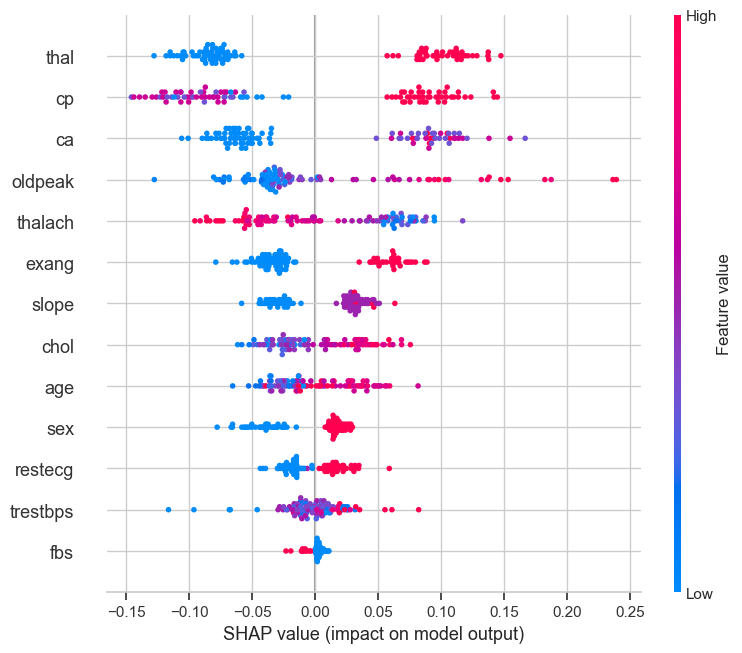

In [53]:
import shap
import matplotlib.pyplot as plt

# Calcolo dei valori SHAP
explainer = shap.TreeExplainer(model_shap)
shap_values = explainer.shap_values(X_test_shap_scaled)

# Verifica la forma corretta
print("✔️ SHAP shape:", shap_values.shape)

# Plot per la classe positiva (classe 1)
shap.summary_plot(
    shap_values[:, :, 1],                  # ← Estrai SHAP per classe 1
    features=X_test_shap_scaled,          # ← Dati test scalati
    feature_names=X_test_shap.columns,    # ← Nomi delle feature
    plot_type="dot",
    show=True
)


In [54]:
from sklearn.metrics import confusion_matrix

# 🔮 Predizioni sul test set
y_pred_shap = model_shap.predict(X_test_shap_scaled)

# 📊 Calcolo della confusion matrix
cm = confusion_matrix(y_test_shap, y_pred_shap)

# 📌 Trova gli indici delle diverse classi
tp_indices = [i for i, (true, pred) in enumerate(zip(y_test_shap, y_pred_shap)) if true == 1 and pred == 1]
tn_indices = [i for i, (true, pred) in enumerate(zip(y_test_shap, y_pred_shap)) if true == 0 and pred == 0]

# 🖨️ Stampa i risultati
print("✅ True Positives (index):", tp_indices)
print("✅ True Negatives (index):", tn_indices)


✅ True Positives (index): [2, 3, 5, 8, 9, 10, 11, 12, 13, 15, 19, 22, 25, 26, 30, 32, 33, 34, 45, 46, 47, 48, 51, 54, 60, 61, 65, 68, 70, 73, 84, 86, 87, 88, 89, 93]
✅ True Negatives (index): [0, 1, 4, 6, 14, 16, 17, 18, 20, 21, 23, 28, 29, 35, 36, 37, 38, 39, 41, 42, 44, 49, 50, 52, 53, 55, 57, 59, 62, 63, 64, 66, 67, 71, 72, 74, 75, 77, 78, 80, 82, 85, 90, 91, 94, 95, 96, 97, 98]


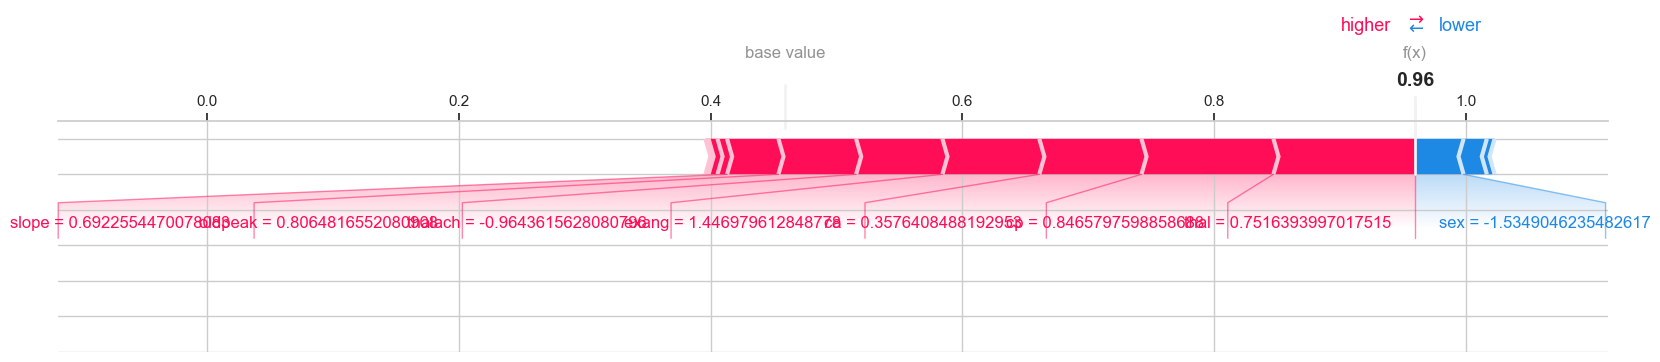

In [55]:
import shap

# Inizializzazione JS per visualizzazione in Jupyter
shap.initjs()

# 🔍 Scegli un indice (es. primo true positive o true negative)
i_local = 2  # <-- Cambia questo indice per visualizzare altri casi

# 🔎 Force plot SHAP locale per la classe positiva (1)
shap.force_plot(
    explainer.expected_value[1],           # Valore base per la classe 1
    shap_values[i_local, :, 1],            # SHAP values dell'istanza i per classe 1
    X_test_shap_scaled[i_local],           # Valori originali dell'istanza (scalati)
    feature_names=X_test_shap.columns,     # Nomi delle 13 feature
    matplotlib=True                        # Visualizza come immagine statica
)


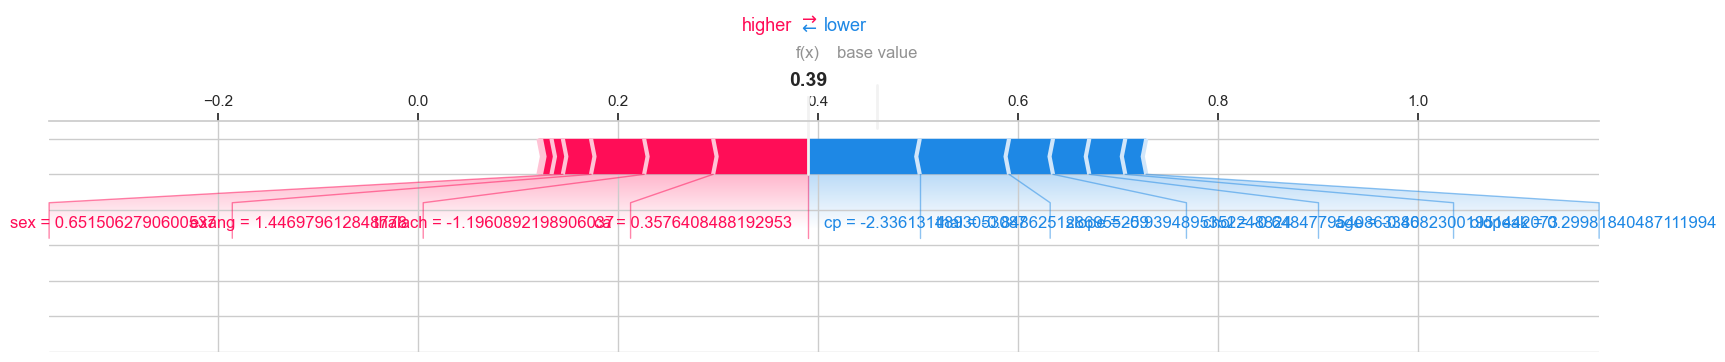

In [56]:
import shap

# Inizializzazione JS per visualizzazione in Jupyter
shap.initjs()

# 🔍 Scegli un indice (es. primo true positive o true negative)
i_local = 0  # <-- Cambia questo indice per visualizzare altri casi

# 🔎 Force plot SHAP locale per la classe positiva (1)
shap.force_plot(
    explainer.expected_value[1],           # Valore base per la classe 1
    shap_values[i_local, :, 1],            # SHAP values dell'istanza i per classe 1
    X_test_shap_scaled[i_local],           # Valori originali dell'istanza (scalati)
    feature_names=X_test_shap.columns,     # Nomi delle 13 feature
    matplotlib=True                        # Visualizza come immagine statica
)


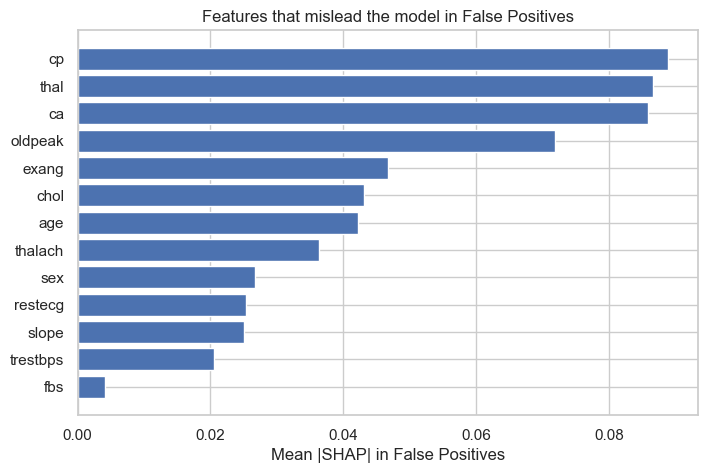

In [57]:
# Estrai shap values dei Falsi Positivi (classe positiva predetta, ma vera era negativa)
shap_fp = shap_values[fp_indices, :, 1]

# Calcola la media assoluta dei contributi per ogni feature nei FP
mean_shap_fp = np.abs(shap_fp).mean(axis=0)

# Crea un grafico barplot per vedere quali feature contribuiscono agli errori
import matplotlib.pyplot as plt
import pandas as pd

fp_df = pd.DataFrame({
    'feature': X_test_shap.columns,
    'mean_abs_shap_fp': mean_shap_fp
}).sort_values(by='mean_abs_shap_fp', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(fp_df['feature'], fp_df['mean_abs_shap_fp'])
plt.xlabel("Mean |SHAP| in False Positives")
plt.title("Features that mislead the model in False Positives")
plt.gca().invert_yaxis()
plt.show()


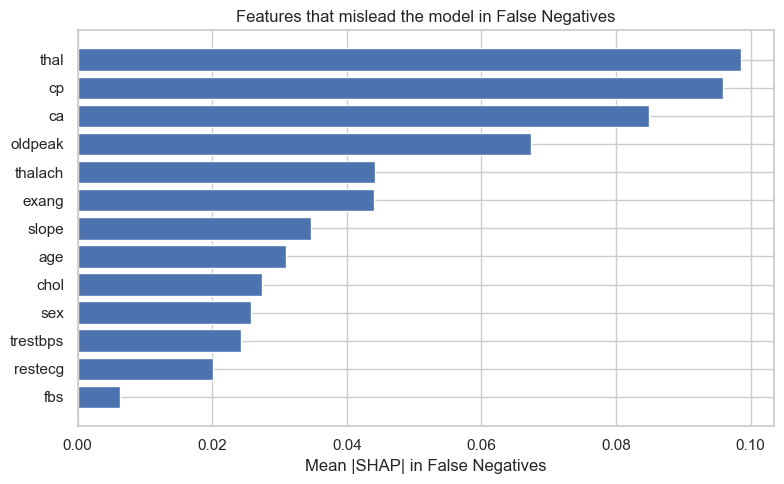

In [58]:
# 🔵 SHAP values per i False Negative (classe vera = 1, predetta = 0)
shap_fn = shap_values[fn_indices, :, 1]  # FN → classe positiva (1)

# 📊 Media dei valori SHAP assoluti per ogni feature nei FN
mean_shap_fn = np.abs(shap_fn).mean(axis=0)

# 📋 Crea dataframe per plotting
fn_df = pd.DataFrame({
    'feature': X_test_shap.columns,
    'mean_abs_shap_fn': mean_shap_fn
}).sort_values(by='mean_abs_shap_fn', ascending=False)

# 📈 Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(fn_df['feature'], fn_df['mean_abs_shap_fn'])
plt.xlabel("Mean |SHAP| in False Negatives")
plt.title("Features that mislead the model in False Negatives")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# TO BE CONTINUED ...